In [189]:
import pandas as pd
import glob
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chi2_contingency

# Load Datasets

In [190]:
def combine_csv_files(folder_path):
    all_files = glob.glob(os.path.join(folder_path, '*.csv'))
    df_list = [pd.read_csv(file) for file in all_files]
    combined_df = pd.concat(df_list, ignore_index=True)
    
    return combined_df

sd_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-datasets/sd'
la_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-datasets/la'

sd_weather_19_23 = combine_csv_files(sd_path)
la_weather_19_23 = combine_csv_files(la_path)

sd_output_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/san_diego_weather_combined.csv'
la_output_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_weather_combined.csv'

os.makedirs(os.path.dirname(sd_output_path), exist_ok=True)

sd_weather_19_23.to_csv(sd_output_path, index=False)
la_weather_19_23.to_csv(la_output_path, index=False)

In [191]:
def load_traffic_data(file_path):
    return pd.read_csv(file_path)

def load_weather_data(file_path):
    return pd.read_csv(file_path)

sd_traffic_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/TIMS_SD_Crashes2013-2024.csv'
la_traffic_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/LA2013-20149crashes.csv'
sd_weather_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/san_diego_weather_combined.csv'
la_weather_path = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_weather_combined.csv'

sd_traffic = load_traffic_data(sd_traffic_path)
la_traffic = load_traffic_data(la_traffic_path)
sd_weather = load_weather_data(sd_weather_path)
la_weather = load_weather_data(la_weather_path)

In [192]:
sd_traffic.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,5639604,2013,2015-01-14,3711,2013-02-01,1816,6000,NaN,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.093777,32.694394
1,5639619,2013,2013-03-11,9680,2013-01-19,410,019936,NaN,6,3,...,0,0,-,-,32.85306,-116.86512,SAN DIEGO,UNINCORPORATED,-116.864564,32.853113
2,5639726,2013,2015-01-14,3711,2013-02-06,1940,3792,3711,3,5,...,0,1,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.079670,32.735391
3,5639817,2013,2015-01-15,3711,2013-02-18,1937,4243,NaN,1,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.122654,32.917255
4,5639818,2013,2013-03-14,3711,2013-02-01,1143,3661,SANDI,5,5,...,0,0,-,-,NaN,NaN,SAN DIEGO,SAN DIEGO,-117.159290,32.990074


In [193]:
sd_traffic.dtypes

CASE_ID             int64
ACCIDENT_YEAR       int64
PROC_DATE          object
JURIS               int64
COLLISION_DATE     object
                   ...   
LONGITUDE         float64
COUNTY             object
CITY               object
POINT_X           float64
POINT_Y           float64
Length: 80, dtype: object

In [194]:
sd_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"San Diego, CA, United States",2022-01-01,63.6,53.0,59.1,63.6,53.0,59.1,45.9,62.0,...,10.5,5,NaN,2022-01-01T06:51:07,2022-01-01T16:53:46,0.97,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
1,"San Diego, CA, United States",2022-01-02,66.5,47.6,55.2,66.5,47.6,55.2,38.9,56.8,...,11.4,5,NaN,2022-01-02T06:51:19,2022-01-02T16:54:31,0.00,Clear,Clear conditions throughout the day.,clear-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
2,"San Diego, CA, United States",2022-01-03,60.2,39.5,50.2,60.2,39.5,50.1,39.7,68.6,...,11.5,5,NaN,2022-01-03T06:51:28,2022-01-03T16:55:17,0.03,Clear,Clear conditions throughout the day.,clear-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
3,"San Diego, CA, United States",2022-01-04,59.3,40.4,50.5,59.3,40.4,50.4,43.5,77.6,...,11.0,5,NaN,2022-01-04T06:51:36,2022-01-04T16:56:04,0.07,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."
4,"San Diego, CA, United States",2022-01-05,63.5,43.2,52.9,63.5,43.2,52.9,46.0,78.7,...,11.0,5,NaN,2022-01-05T06:51:42,2022-01-05T16:56:52,0.10,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KNZY,CI184,KSAN,72290693112,72290023188,KMYF,7..."


In [195]:
sd_weather.dtypes

name                 object
datetime             object
tempmax             float64
tempmin             float64
temp                float64
feelslikemax        float64
feelslikemin        float64
feelslike           float64
dew                 float64
humidity            float64
precip              float64
precipprob            int64
precipcover         float64
preciptype           object
snow                  int64
snowdepth             int64
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
stations             object
dtype: object

In [196]:
la_traffic.head()

,CASE_ID,ACCIDENT_YEAR,PROC_DATE,JURIS,COLLISION_DATE,COLLISION_TIME,OFFICER_ID,REPORTING_DISTRICT,DAY_OF_WEEK,CHP_SHIFT,...,COUNT_MC_KILLED,COUNT_MC_INJURED,PRIMARY_RAMP,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y
0,9389661,2021,2022-01-13,1976,2021-12-06,1904,560,NaN,1,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,WHITTIER,-118.039719,33.977261
1,9396835,2022,2022-02-10,1942,2022-01-12,1840,37724,1806,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.256432,33.953281
2,9401153,2021,2022-02-11,1953,2021-12-15,1434,7231,1953,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,PASADENA,-118.121292,34.137810
3,9406663,2022,2022-03-07,1941,2022-02-03,1633,11099,NaN,4,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LONG BEACH,-118.141579,33.769855
4,9435305,2021,2022-04-22,1942,2021-12-08,1820,34482,2014,3,5,...,0,0,-,-,NaN,NaN,LOS ANGELES,LOS ANGELES,-118.302330,34.076279


In [197]:
la_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Los Angeles, CA, United States",2019-01-01,61.4,40.8,51.0,61.4,40.8,50.5,12.4,22.5,...,12.2,6,NaN,2019-01-01T06:58:41,2019-01-01T16:54:35,0.85,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,CQ070"
1,"Los Angeles, CA, United States",2019-01-02,60.6,39.4,50.1,60.6,37.6,49.9,20.8,32.5,...,10.6,6,NaN,2019-01-02T06:58:51,2019-01-02T16:55:21,0.89,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,D4813,..."
2,"Los Angeles, CA, United States",2019-01-03,65.1,43.6,53.5,65.1,43.6,53.5,28.9,42.0,...,12.2,6,NaN,2019-01-03T06:59:01,2019-01-03T16:56:08,0.92,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,CQ070"
3,"Los Angeles, CA, United States",2019-01-04,63.2,43.6,53.1,63.2,43.1,53.0,34.8,51.6,...,12.0,6,NaN,2019-01-04T06:59:08,2019-01-04T16:56:56,0.96,Clear,Clear conditions throughout the day.,clear-day,"A2968,KHHR,72295023174,KBUR,72295603167,CQ070"
4,"Los Angeles, CA, United States",2019-01-05,57.2,48.3,52.5,57.2,46.5,52.2,43.7,72.4,...,2.3,1,NaN,2019-01-05T06:59:13,2019-01-05T16:57:45,0.00,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"A2968,KHHR,72295023174,KBUR,KCQT,72295603167,C..."


# Data Preprocessing

In [198]:
# Traffic data
sd_traffic['COLLISION_DATE'] = pd.to_datetime(sd_traffic['COLLISION_DATE'], errors='coerce')
sd_traffic['PROC_DATE'] = pd.to_datetime(sd_traffic['PROC_DATE'], errors='coerce')

la_traffic['COLLISION_DATE'] = pd.to_datetime(la_traffic['COLLISION_DATE'], errors='coerce')
la_traffic['PROC_DATE'] = pd.to_datetime(la_traffic['PROC_DATE'], errors='coerce')

# Weather data
sd_weather['datetime'] = pd.to_datetime(sd_weather['datetime'], errors='coerce')
la_weather['datetime'] = pd.to_datetime(la_weather['datetime'], errors='coerce')

In [199]:
sd_traffic.dropna(subset=['COLLISION_DATE'], inplace=True)
la_traffic.dropna(subset=['COLLISION_DATE'], inplace=True)
sd_weather.dropna(subset=['datetime'], inplace=True)
la_weather.dropna(subset=['datetime'], inplace=True)

In [200]:
sd_traffic.drop(columns=['OFFICER_ID', 'REPORTING_DISTRICT', 'PROC_DATE'], inplace=True, errors='ignore')
la_traffic.drop(columns=['OFFICER_ID', 'REPORTING_DISTRICT', 'PROC_DATE'], inplace=True, errors='ignore')

sd_weather.drop(columns=['name', 'feelslikemax', 'feelslikemin', 'feelslike', 
                         'solarenergy', 'sunrise', 'sunset', 'stations'], inplace=True, errors='ignore')

la_weather.drop(columns=['name', 'feelslikemax', 'feelslikemin', 'feelslike', 
                         'solarenergy', 'sunrise', 'sunset', 'stations'], inplace=True, errors='ignore')

In [201]:
sd_traffic['COLLISION_DATE'] = sd_traffic['COLLISION_DATE'].dt.date
la_traffic['COLLISION_DATE'] = la_traffic['COLLISION_DATE'].dt.date

sd_weather['datetime'] = sd_weather['datetime'].dt.date
la_weather['datetime'] = la_weather['datetime'].dt.date

In [202]:
sd_traffic['CITY'] = sd_traffic['CITY'].str.lower().str.strip()
la_traffic['CITY'] = la_traffic['CITY'].str.lower().str.strip()

sd_weather['conditions'] = sd_weather['conditions'].str.lower().str.strip()
la_weather['conditions'] = la_weather['conditions'].str.lower().str.strip()

In [203]:
sd_combined = pd.merge(
    sd_traffic,
    sd_weather[['datetime', 'icon']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

la_combined = pd.merge(
    la_traffic,
    la_weather[['datetime', 'icon']],
    left_on='COLLISION_DATE',
    right_on='datetime',
    how='left'
)

In [204]:
sd_combined['icon'].fillna(method='ffill', inplace=True)
sd_combined['icon'].fillna(method='bfill', inplace=True)

la_combined['icon'].fillna(method='ffill', inplace=True)
la_combined['icon'].fillna(method='bfill', inplace=True)

In [205]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

sd_weather = remove_outliers(sd_weather, 'temp')
sd_weather = remove_outliers(sd_weather, 'windspeed')
sd_weather = remove_outliers(sd_weather, 'humidity')

la_weather = remove_outliers(la_weather, 'temp')
la_weather = remove_outliers(la_weather, 'windspeed')
la_weather = remove_outliers(la_weather, 'humidity')

In [206]:
sd_combined['COLLISION_DATE'] = pd.to_datetime(sd_combined['COLLISION_DATE']).dt.date
sd_weather['datetime'] = pd.to_datetime(sd_weather['datetime']).dt.date

In [207]:
weather_mapping = {
    'clear-day': 'clear',
    'clear-night': 'clear',
    'partly-cloudy-day': 'cloudy',
    'partly-cloudy-night': 'cloudy',
    'cloudy': 'cloudy',
    'rain': 'rainy',
    'wind': 'windy',
    'snow': 'snowy',
    'sleet': 'snowy',
    'fog': 'foggy',
    'overcast': 'cloudy'
}

# Apply weather mapping
sd_combined['weather_group'] = sd_combined['icon'].map(weather_mapping)
la_combined['weather_group'] = la_combined['icon'].map(weather_mapping)

In [208]:
sd_combined.dropna(subset=['weather_group'], inplace=True)
la_combined.dropna(subset=['weather_group'], inplace=True)

In [209]:
sd_combined_filtered = sd_combined[
    (sd_combined['COLLISION_DATE'] >= pd.to_datetime('2019-01-01').date()) & 
    (sd_combined['COLLISION_DATE'] <= pd.to_datetime('2023-12-31').date())
]

la_combined_filtered = la_combined[
    (la_combined['COLLISION_DATE'] >= pd.to_datetime('2019-01-01').date()) & 
    (la_combined['COLLISION_DATE'] <= pd.to_datetime('2023-12-31').date())
]


In [210]:
output_path_sd = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/sd_combined.csv'
output_path_la = '/Users/annaywj/Desktop/SDSU/BDA600/Capstone/weather-dataset/la_combined.csv'

sd_combined.to_csv(output_path_sd, index=False)
la_combined.to_csv(output_path_la, index=False)


In [211]:
sd_combined.head()

,CASE_ID,ACCIDENT_YEAR,JURIS,COLLISION_DATE,COLLISION_TIME,DAY_OF_WEEK,CHP_SHIFT,POPULATION,CNTY_CITY_LOC,SPECIAL_COND,...,SECONDARY_RAMP,LATITUDE,LONGITUDE,COUNTY,CITY,POINT_X,POINT_Y,datetime,icon,weather_group
0,5639604,2013,3711,2013-02-01,1816,5,5,7,3711,0,...,-,NaN,NaN,SAN DIEGO,san diego,-117.093777,32.694394,NaN,partly-cloudy-day,cloudy
1,5639619,2013,9680,2013-01-19,410,6,3,9,3700,0,...,-,32.85306,-116.86512,SAN DIEGO,unincorporated,-116.864564,32.853113,NaN,partly-cloudy-day,cloudy
2,5639726,2013,3711,2013-02-06,1940,3,5,7,3711,0,...,-,NaN,NaN,SAN DIEGO,san diego,-117.079670,32.735391,NaN,partly-cloudy-day,cloudy
3,5639817,2013,3711,2013-02-18,1937,1,5,7,3711,0,...,-,NaN,NaN,SAN DIEGO,san diego,-117.122654,32.917255,NaN,partly-cloudy-day,cloudy
4,5639818,2013,3711,2013-02-01,1143,5,5,7,3711,0,...,-,NaN,NaN,SAN DIEGO,san diego,-117.159290,32.990074,NaN,partly-cloudy-day,cloudy


In [212]:
print(sd_combined.isnull().sum())
print(la_combined.isnull().sum())

CASE_ID              0
ACCIDENT_YEAR        0
JURIS                0
COLLISION_DATE       0
COLLISION_TIME       0
                  ... 
POINT_X              0
POINT_Y              0
datetime          7291
icon                 0
weather_group        0
Length: 80, dtype: int64
CASE_ID               0
ACCIDENT_YEAR         0
JURIS                 0
COLLISION_DATE        0
COLLISION_TIME        0
                  ...  
POINT_X               0
POINT_Y               0
datetime          34186
icon                  0
weather_group         0
Length: 80, dtype: int64


# Time-Series Analysis

#### Monthly and Yearly Trend of Traffic Accidents

In [213]:
# Convert back to datetime format
sd_combined['COLLISION_DATE'] = pd.to_datetime(sd_combined['COLLISION_DATE'])
la_combined['COLLISION_DATE'] = pd.to_datetime(la_combined['COLLISION_DATE'])

In [214]:
# Create time-based features
sd_combined['year'] = sd_combined['COLLISION_DATE'].dt.year
sd_combined['month'] = sd_combined['COLLISION_DATE'].dt.month
sd_combined['day_of_week'] = sd_combined['COLLISION_DATE'].dt.dayofweek

la_combined['year'] = la_combined['COLLISION_DATE'].dt.year
la_combined['month'] = la_combined['COLLISION_DATE'].dt.month
la_combined['day_of_week'] = la_combined['COLLISION_DATE'].dt.dayofweek

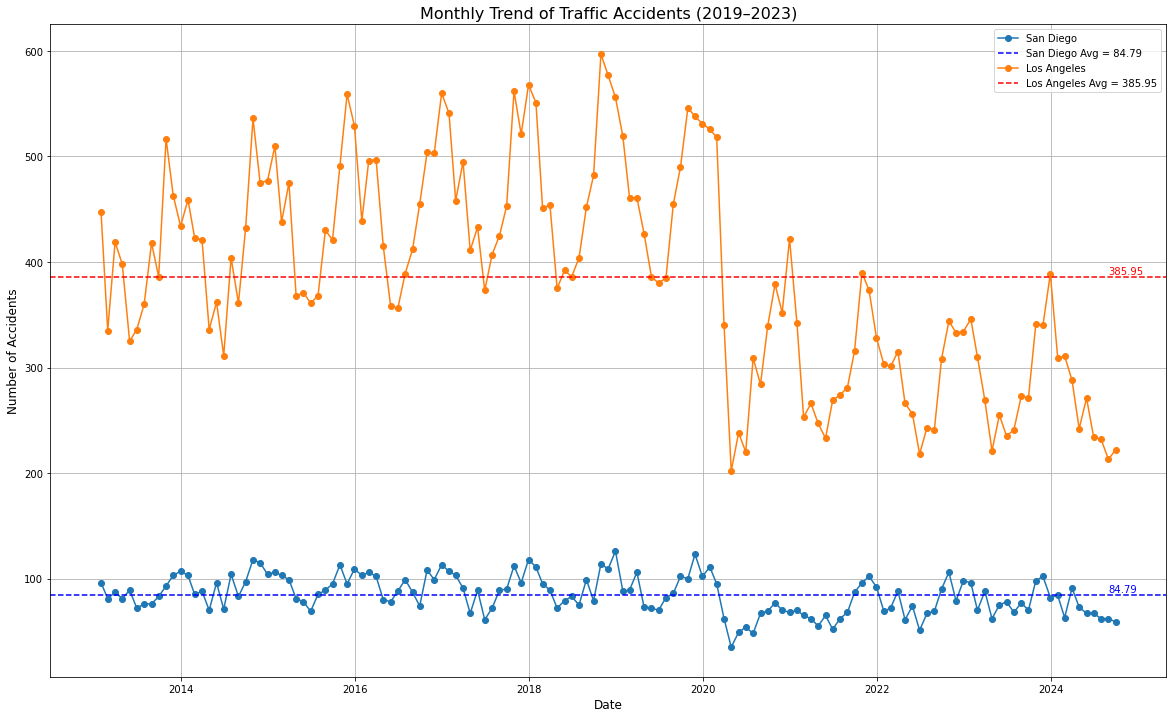

In [215]:
# Group data by month and count accidents
sd_monthly = sd_combined.resample('M', on='COLLISION_DATE').size()
la_monthly = la_combined.resample('M', on='COLLISION_DATE').size()

# Calculate average values
sd_monthly_avg = sd_monthly.mean()
la_monthly_avg = la_monthly.mean()

# Plot monthly trend with average lines
plt.figure(figsize=(20, 12))
plt.plot(sd_monthly, label='San Diego', marker='o')
plt.axhline(sd_monthly_avg, color='blue', linestyle='--', label=f'San Diego Avg = {sd_monthly_avg:.2f}')
plt.text(sd_monthly.index[-2], sd_monthly_avg + 2, f'{sd_monthly_avg:.2f}', color='blue')

plt.plot(la_monthly, label='Los Angeles', marker='o')
plt.axhline(la_monthly_avg, color='red', linestyle='--', label=f'Los Angeles Avg = {la_monthly_avg:.2f}')
plt.text(la_monthly.index[-2], la_monthly_avg + 2, f'{la_monthly_avg:.2f}', color='red')

plt.title('Monthly Trend of Traffic Accidents (2019–2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


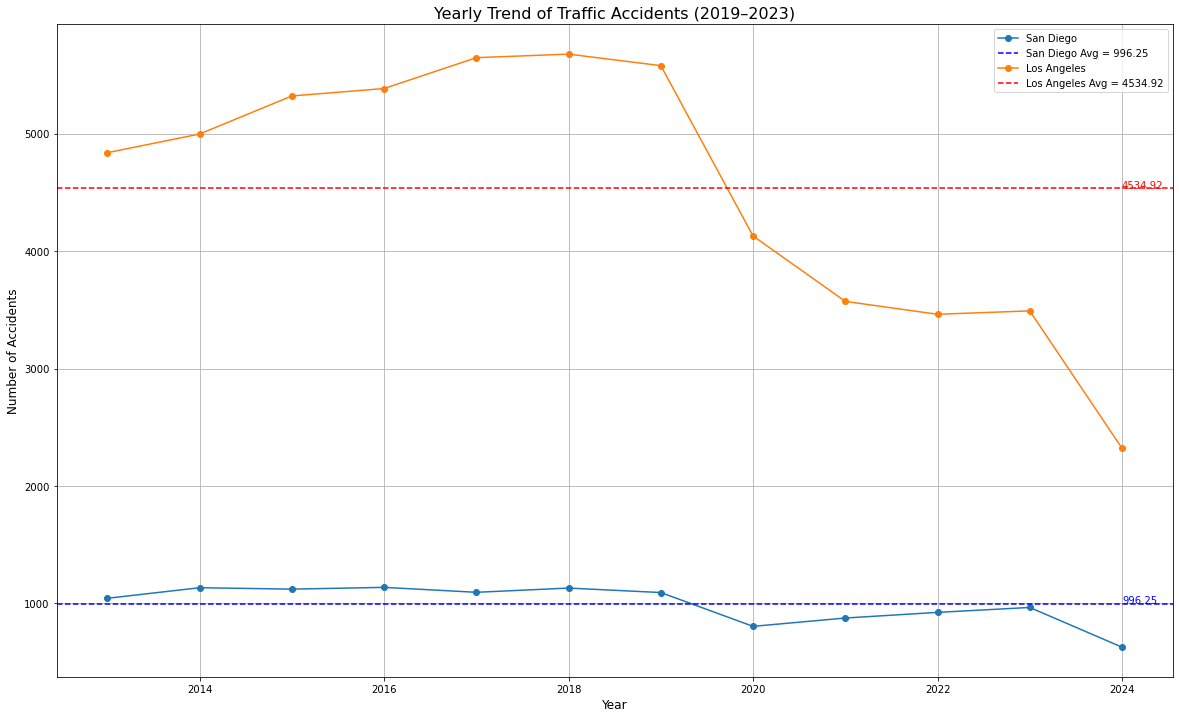

In [216]:
# Group by year
sd_yearly = sd_combined['year'].value_counts().sort_index()
la_yearly = la_combined['year'].value_counts().sort_index()

# Calculate average values
sd_yearly_avg = sd_yearly.mean()
la_yearly_avg = la_yearly.mean()

# Plot yearly trend with average lines
plt.figure(figsize=(20, 12))
sd_yearly.plot(label='San Diego', marker='o')
plt.axhline(sd_yearly_avg, color='blue', linestyle='--', label=f'San Diego Avg = {sd_yearly_avg:.2f}')
plt.text(sd_yearly.index[-1], sd_yearly_avg + 2, f'{sd_yearly_avg:.2f}', color='blue')

la_yearly.plot(label='Los Angeles', marker='o')
plt.axhline(la_yearly_avg, color='red', linestyle='--', label=f'Los Angeles Avg = {la_yearly_avg:.2f}')
plt.text(la_yearly.index[-1], la_yearly_avg + 2, f'{la_yearly_avg:.2f}', color='red')

plt.title('Yearly Trend of Traffic Accidents (2019–2023)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


#### Weather Impact on Accidents

In [217]:
sd_filtered = sd_combined[
    (sd_combined['COLLISION_DATE'] >= pd.to_datetime('2019-01-01')) &
    (sd_combined['COLLISION_DATE'] <= pd.to_datetime('2023-12-31'))
]

la_filtered = la_combined[
    (la_combined['COLLISION_DATE'] >= pd.to_datetime('2019-01-01')) &
    (la_combined['COLLISION_DATE'] <= pd.to_datetime('2023-12-31'))
]

In [218]:
sd_weather_trend = sd_filtered.groupby(
    ['year', 'month', 'weather_group']
).size().unstack(fill_value=0)

la_weather_trend = la_filtered.groupby(
    ['year', 'month', 'weather_group']
).size().unstack(fill_value=0)


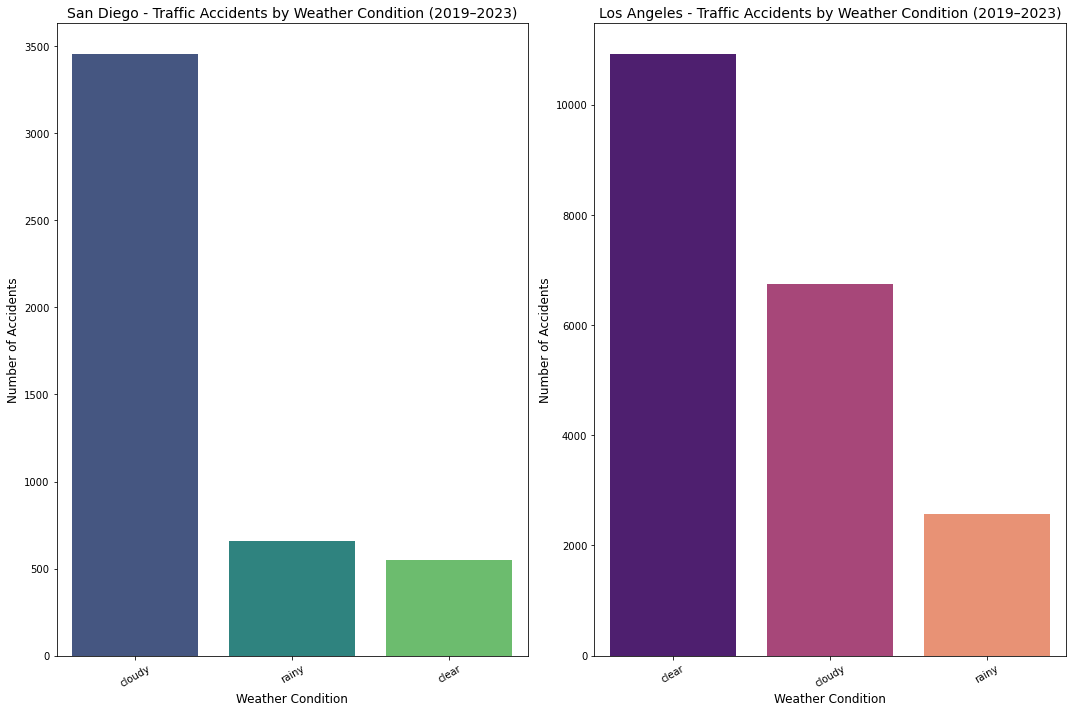

In [219]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.countplot(
    x='weather_group', 
    data=sd_filtered, 
    palette='viridis',  # Choose a colorful palette
    order=sd_filtered['weather_group'].value_counts().index
)
plt.title('San Diego - Traffic Accidents by Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30)

# ------------------------
# Histogram for Los Angeles
# ------------------------
plt.subplot(1, 2, 2)
sns.countplot(
    x='weather_group', 
    data=la_filtered, 
    palette='magma',  # Choose a different colorful palette for LA
    order=la_filtered['weather_group'].value_counts().index
)
plt.title('Los Angeles - Traffic Accidents by Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Weather Condition', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [220]:
sd_traffic.dtypes

CASE_ID             int64
ACCIDENT_YEAR       int64
JURIS               int64
COLLISION_DATE     object
COLLISION_TIME      int64
                   ...   
LONGITUDE         float64
COUNTY             object
CITY               object
POINT_X           float64
POINT_Y           float64
Length: 77, dtype: object

In [222]:
# Clean collision time and convert to hour
# Step 1: Replace missing or invalid times with NaN
sd_filtered['COLLISION_TIME'] = pd.to_numeric(sd_filtered['COLLISION_TIME'], errors='coerce')
la_filtered['COLLISION_TIME'] = pd.to_numeric(la_filtered['COLLISION_TIME'], errors='coerce')

# Step 2: Convert to string and handle edge cases
sd_filtered['COLLISION_TIME'] = sd_filtered['COLLISION_TIME'].astype(str).str.zfill(4)
la_filtered['COLLISION_TIME'] = la_filtered['COLLISION_TIME'].astype(str).str.zfill(4)

# Step 3: Extract the hour using datetime conversion
sd_filtered['hour'] = pd.to_datetime(sd_filtered['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour
la_filtered['hour'] = pd.to_datetime(la_filtered['COLLISION_TIME'], format='%H%M', errors='coerce').dt.hour

# Step 4: Drop NaNs from hour column
sd_filtered = sd_filtered.dropna(subset=['hour'])
la_filtered = la_filtered.dropna(subset=['hour'])

# Step 5: Convert to integer
sd_filtered['hour'] = sd_filtered['hour'].astype(int)
la_filtered['hour'] = la_filtered['hour'].astype(int)


/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/388251911.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sd_filtered['COLLISION_TIME'] = pd.to_numeric(sd_filtered['COLLISION_TIME'], errors='coerce')
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/388251911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  la_filtered['COLLISION_TIME'] = pd.to_numeric(la_filtered['COLLISION_TIME'], errors='coerce')
/var/folders/4k/gkr388115hjbdbj5xzxdyy9h0000gn/T/ipykernel_22533/38825

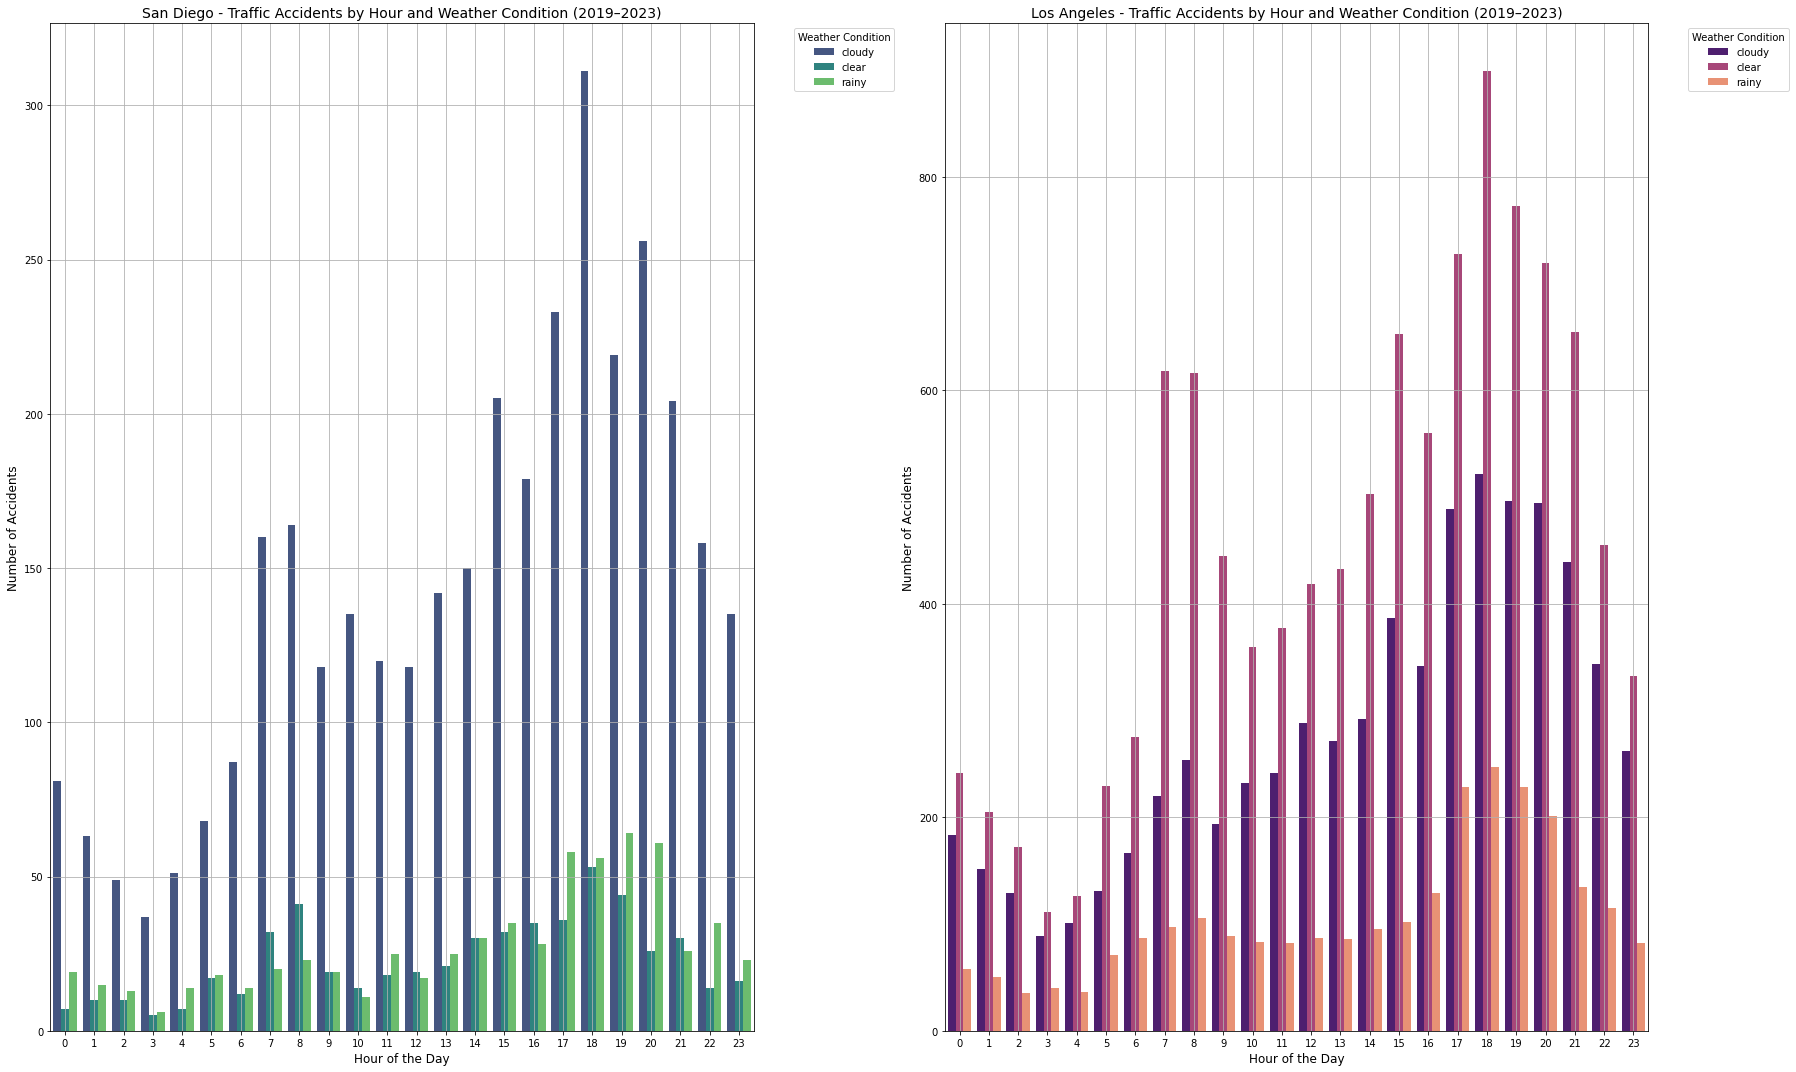

In [223]:
plt.figure(figsize=(25, 15))

# ------------------------
# San Diego
# ------------------------
plt.subplot(1, 2, 1)
sns.countplot(
    x='hour', 
    hue='weather_group', 
    data=sd_filtered,
    palette='viridis'
)
plt.title('San Diego - Traffic Accidents by Hour and Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# ------------------------
# Los Angeles
# ------------------------
plt.subplot(1, 2, 2)
sns.countplot(
    x='hour', 
    hue='weather_group', 
    data=la_filtered,
    palette='magma'
)
plt.title('Los Angeles - Traffic Accidents by Hour and Weather Condition (2019–2023)', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# ------------------------
# Final Adjustments
# ------------------------
plt.tight_layout()
plt.show()

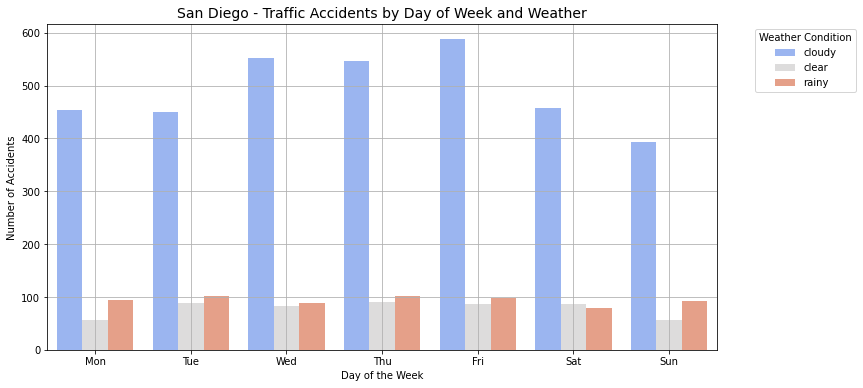

In [225]:
plt.figure(figsize=(12, 6))
sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=sd_filtered, palette='coolwarm')
plt.title('San Diego - Traffic Accidents by Day of Week and Weather', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

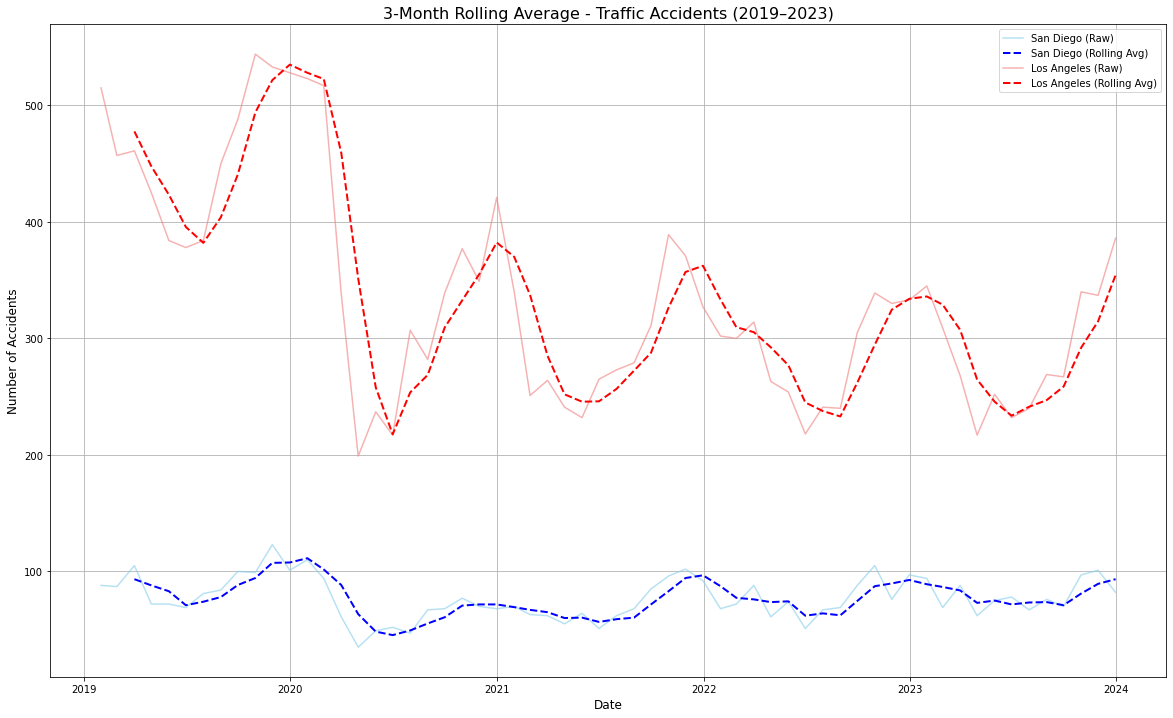

In [ ]:
sd_monthly = sd_filtered.resample('M', on='COLLISION_DATE').size()
la_monthly = la_filtered.resample('M', on='COLLISION_DATE').size()

# Compute 3-month rolling average
sd_monthly_rolling = sd_monthly.rolling(window=3).mean()
la_monthly_rolling = la_monthly.rolling(window=3).mean()

plt.figure(figsize=(20, 12))

# ------------------------
# San Diego
# ------------------------
plt.plot(sd_monthly, label='San Diego (Raw)', color='skyblue', alpha=0.6, linestyle='-')
plt.plot(sd_monthly_rolling, label='San Diego (Rolling Avg)', color='blue', linestyle='--', linewidth=2)

# ------------------------
# Los Angeles
# ------------------------
plt.plot(la_monthly, label='Los Angeles (Raw)', color='lightcoral', alpha=0.6, linestyle='-')
plt.plot(la_monthly_rolling, label='Los Angeles (Rolling Avg)', color='red', linestyle='--', linewidth=2)

# ------------------------
# Styling
# ------------------------
plt.title('3-Month Rolling Average - Traffic Accidents (2019–2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

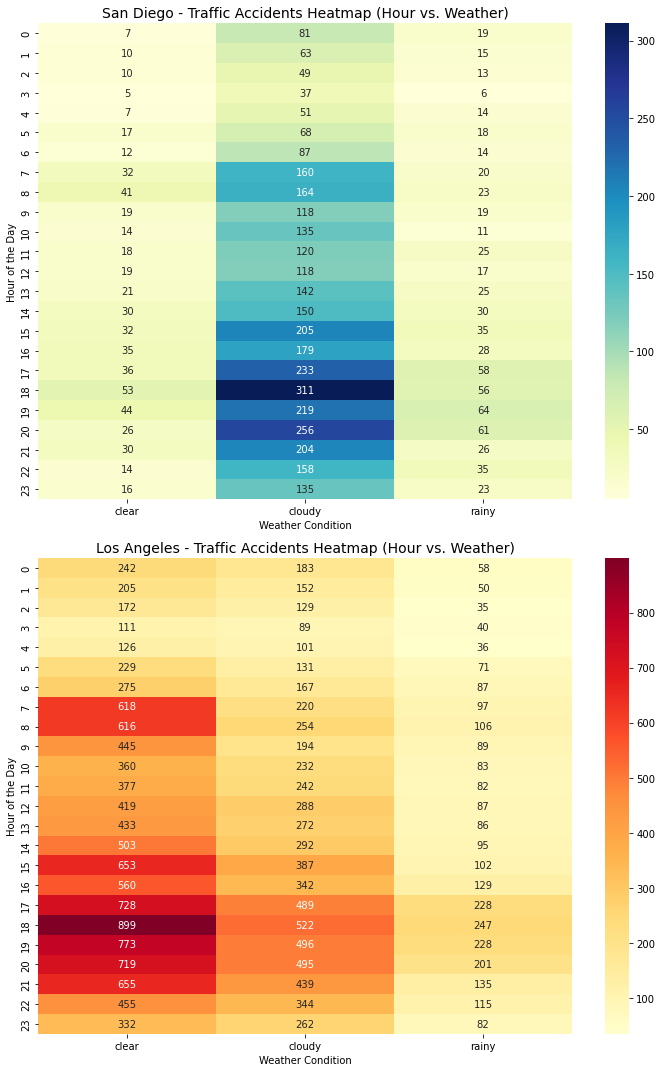

In [227]:
# Create subplots for side-by-side comparison

fig, axs = plt.subplots(2, 1, figsize=(10, 15))

# ----------------------------
# 1. HEATMAP - Hour vs. Weather Condition
# ----------------------------
sd_pivot = sd_filtered.pivot_table(index='hour', columns='weather_group', values='CASE_ID', aggfunc='count', fill_value=0)
sns.heatmap(sd_pivot, cmap='YlGnBu', annot=True, fmt='d', ax=axs[0])
axs[0].set_title('San Diego - Traffic Accidents Heatmap (Hour vs. Weather)', fontsize=14)
axs[0].set_xlabel('Weather Condition')
axs[0].set_ylabel('Hour of the Day')

la_pivot = la_filtered.pivot_table(index='hour', columns='weather_group', values='CASE_ID', aggfunc='count', fill_value=0)
sns.heatmap(la_pivot, cmap='YlOrRd', annot=True, fmt='d', ax=axs[1])
axs[1].set_title('Los Angeles - Traffic Accidents Heatmap (Hour vs. Weather)', fontsize=14)
axs[1].set_xlabel('Weather Condition')
axs[1].set_ylabel('Hour of the Day')

plt.tight_layout()
plt.show()


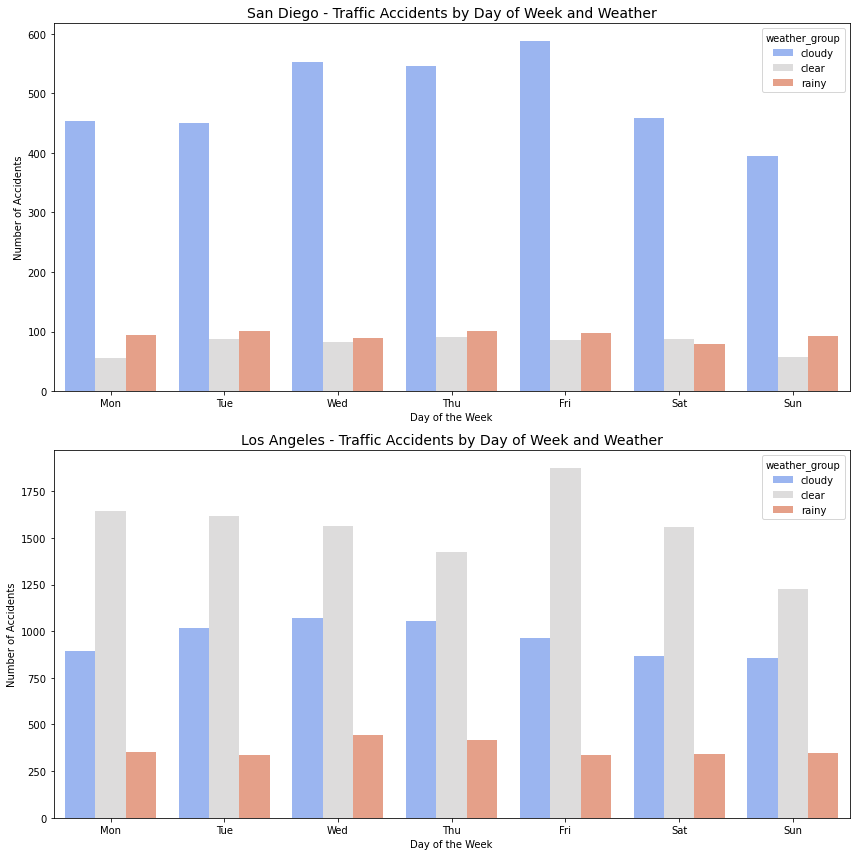

In [228]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=sd_filtered, palette='coolwarm', ax=axs[0])
axs[0].set_title('San Diego - Traffic Accidents by Day of Week and Weather', fontsize=14)
axs[0].set_xlabel('Day of the Week')
axs[0].set_ylabel('Number of Accidents')
axs[0].set_xticks(range(7))
axs[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

sns.countplot(x='DAY_OF_WEEK', hue='weather_group', data=la_filtered, palette='coolwarm', ax=axs[1])
axs[1].set_title('Los Angeles - Traffic Accidents by Day of Week and Weather', fontsize=14)
axs[1].set_xlabel('Day of the Week')
axs[1].set_ylabel('Number of Accidents')
axs[1].set_xticks(range(7))
axs[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.tight_layout()
plt.show()


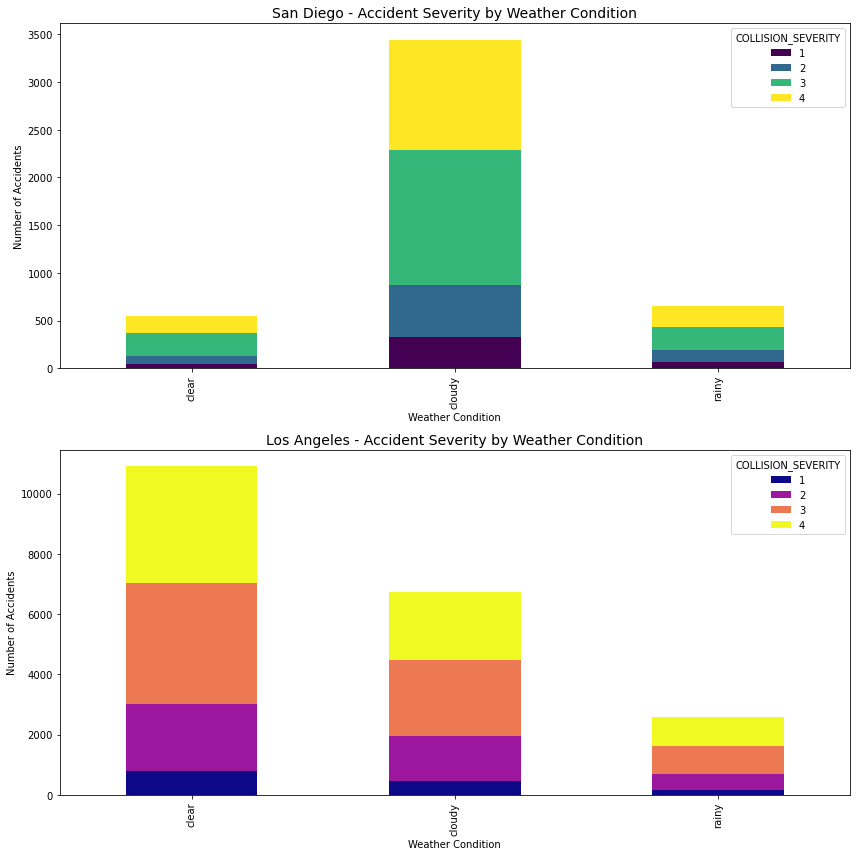

In [229]:
fig, axs = plt.subplots(2, 1, figsize=(12, 12))

sd_severity_counts = sd_filtered.groupby(['weather_group', 'COLLISION_SEVERITY']).size().unstack(fill_value=0)
sd_severity_counts.plot(kind='bar', stacked=True, colormap='viridis', ax=axs[0])
axs[0].set_title('San Diego - Accident Severity by Weather Condition', fontsize=14)
axs[0].set_xlabel('Weather Condition')
axs[0].set_ylabel('Number of Accidents')

la_severity_counts = la_filtered.groupby(['weather_group', 'COLLISION_SEVERITY']).size().unstack(fill_value=0)
la_severity_counts.plot(kind='bar', stacked=True, colormap='plasma', ax=axs[1])
axs[1].set_title('Los Angeles - Accident Severity by Weather Condition', fontsize=14)
axs[1].set_xlabel('Weather Condition')
axs[1].set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

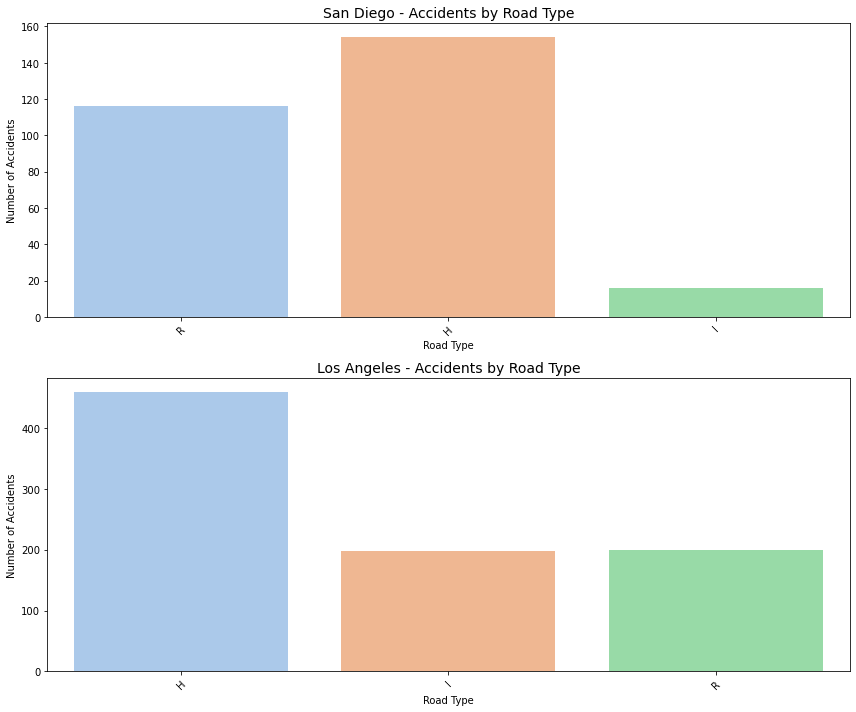

In [230]:
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

sns.countplot(x='LOCATION_TYPE', data=sd_filtered, palette='pastel', ax=axs[0])
axs[0].set_title('San Diego - Accidents by Road Type', fontsize=14)
axs[0].set_xlabel('Road Type')
axs[0].set_ylabel('Number of Accidents')
axs[0].tick_params(axis='x', rotation=45)

sns.countplot(x='LOCATION_TYPE', data=la_filtered, palette='pastel', ax=axs[1])
axs[1].set_title('Los Angeles - Accidents by Road Type', fontsize=14)
axs[1].set_xlabel('Road Type')
axs[1].set_ylabel('Number of Accidents')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [235]:
sd_combined = pd.merge(sd_filtered, sd_weather, on='datetime', how='left')
la_combined = pd.merge(la_filtered, la_weather, on='datetime', how='left')

weather_cols = ['temp', 'humidity', 'windspeed', 'cloudcover']
for col in weather_cols:
    sd_combined[col] = sd_combined[col].fillna(sd_combined[col].mean())
    la_combined[col] = la_combined[col].fillna(la_combined[col].mean())
    
sd_combined.to_csv('san_diego_combined.csv', index=False)
la_combined.to_csv('los_angeles_combined.csv', index=False)

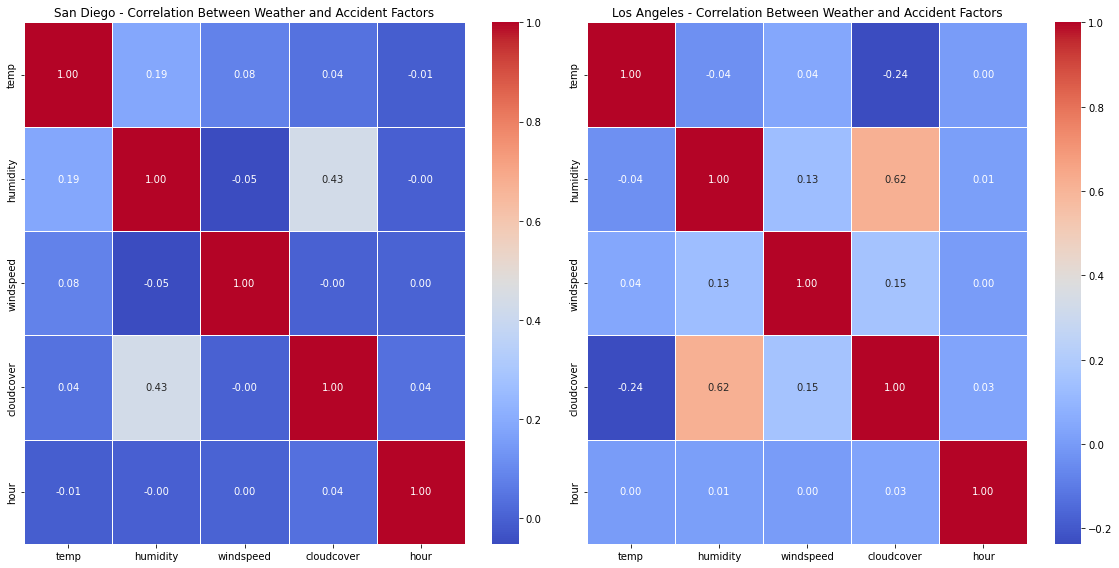

In [237]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

sd_corr = sd_combined[['temp', 'humidity', 'windspeed', 'cloudcover', 'hour']].corr()
sns.heatmap(sd_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=axs[0])
axs[0].set_title('San Diego - Correlation Between Weather and Accident Factors')

la_corr = la_combined[['temp', 'humidity', 'windspeed', 'cloudcover', 'hour']].corr()
sns.heatmap(la_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, ax=axs[1])
axs[1].set_title('Los Angeles - Correlation Between Weather and Accident Factors')

plt.tight_layout()
plt.show()

Text(0.5, 1.02, 'Los Angeles - Pair Plot')

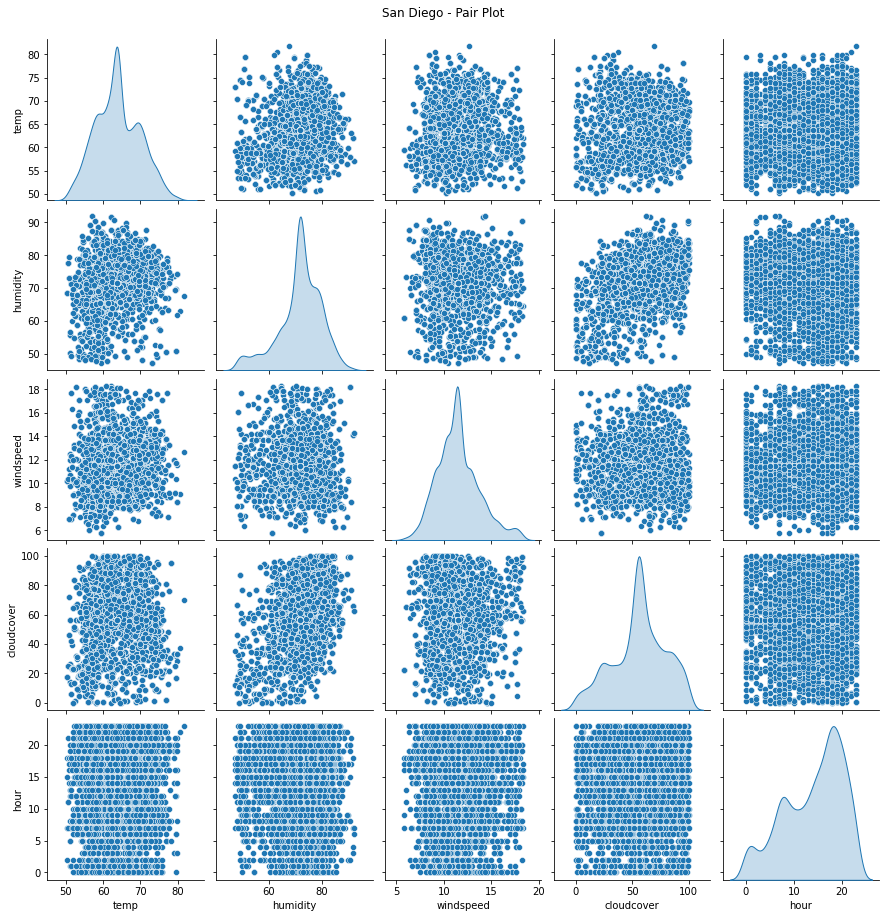

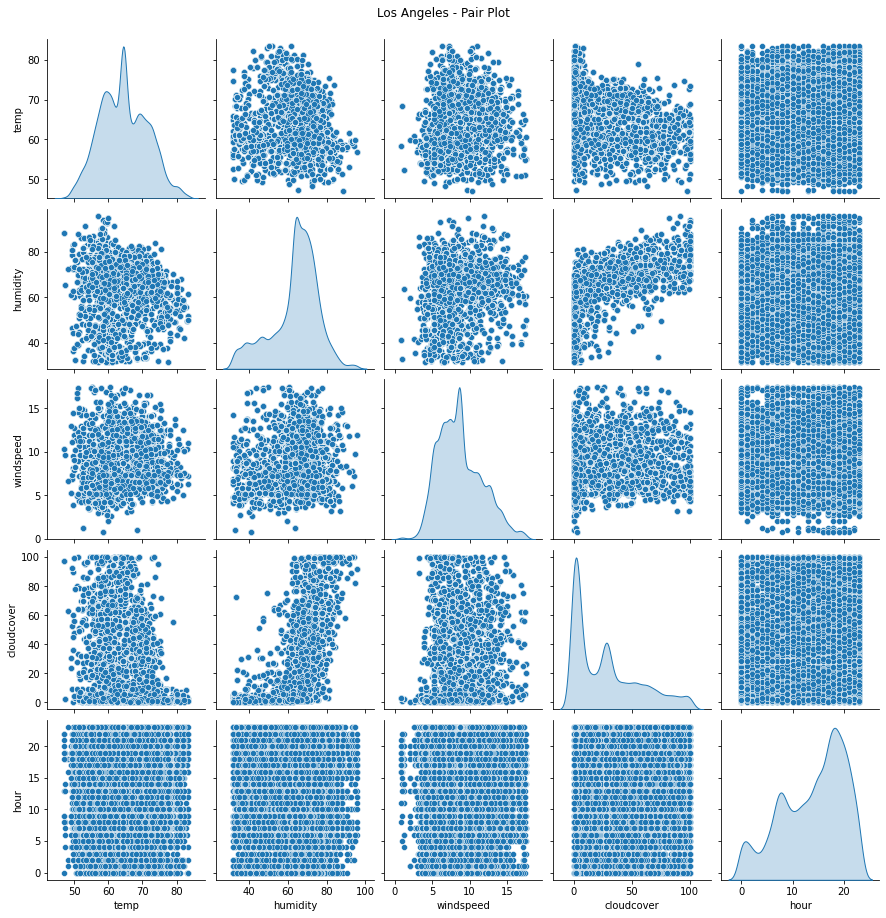

In [238]:
sns.pairplot(sd_combined[['temp', 'humidity', 'windspeed', 'cloudcover', 'hour']], diag_kind='kde')
plt.suptitle('San Diego - Pair Plot', y=1.02)

sns.pairplot(la_combined[['temp', 'humidity', 'windspeed', 'cloudcover', 'hour']], diag_kind='kde')
plt.suptitle('Los Angeles - Pair Plot', y=1.02)

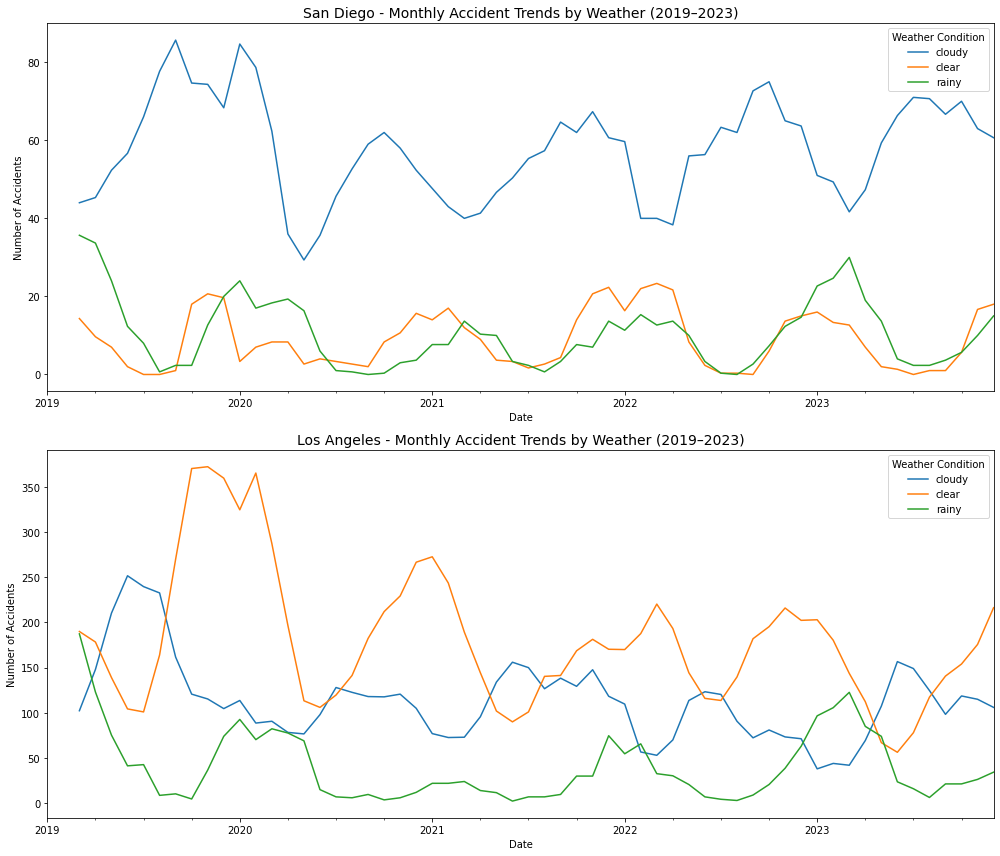

In [240]:
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

for condition in sd_combined['weather_group'].unique():
    data = sd_combined[sd_combined['weather_group'] == condition].resample('M', on='COLLISION_DATE').size()
    data.rolling(window=3).mean().plot(label=condition, ax=axs[0])
axs[0].set_title('San Diego - Monthly Accident Trends by Weather (2019–2023)', fontsize=14)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of Accidents')
axs[0].legend(title='Weather Condition')

for condition in la_combined['weather_group'].unique():
    data = la_combined[la_combined['weather_group'] == condition].resample('M', on='COLLISION_DATE').size()
    data.rolling(window=3).mean().plot(label=condition, ax=axs[1])
axs[1].set_title('Los Angeles - Monthly Accident Trends by Weather (2019–2023)', fontsize=14)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Number of Accidents')
axs[1].legend(title='Weather Condition')

plt.tight_layout()
plt.show()

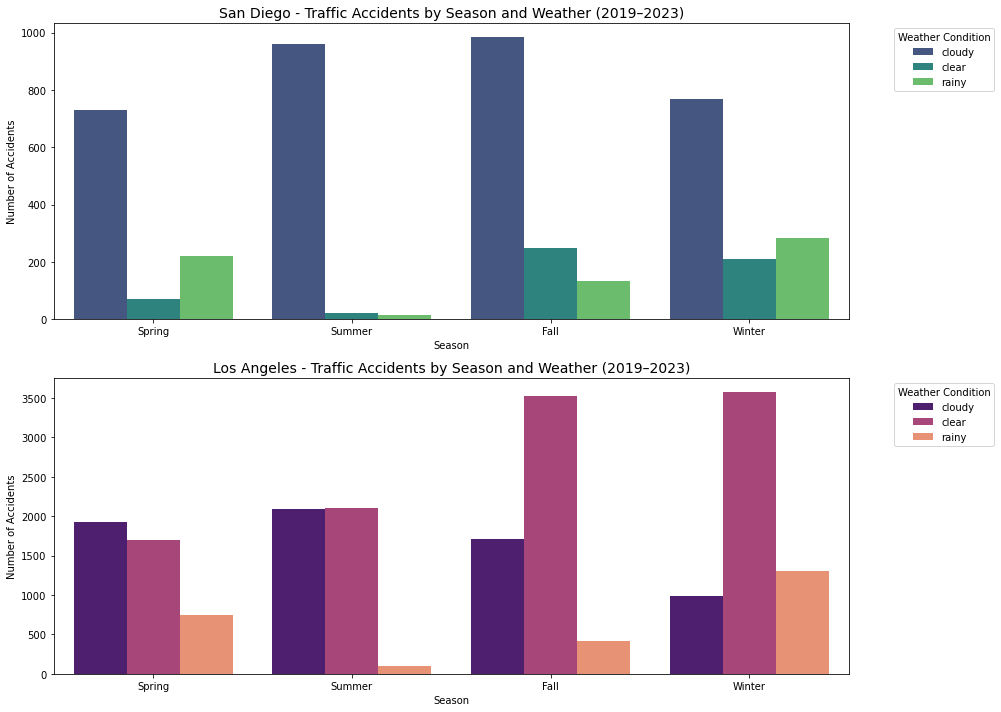

In [243]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

sd_combined['season'] = sd_combined['month'].apply(get_season)
la_combined['season'] = la_combined['month'].apply(get_season)

season_order = ['Spring', 'Summer', 'Fall', 'Winter']
sd_combined['season'] = pd.Categorical(sd_combined['season'], categories=season_order, ordered=True)
la_combined['season'] = pd.Categorical(la_combined['season'], categories=season_order, ordered=True)

# ----------------------------
# PLOT SEASONAL DATA
# ----------------------------
fig, axs = plt.subplots(2, 1, figsize=(14, 10))

# San Diego
sns.countplot(
    x='season', 
    hue='weather_group', 
    data=sd_combined, 
    palette='viridis',
    order=season_order,
    ax=axs[0]
)
axs[0].set_title('San Diego - Traffic Accidents by Season and Weather (2019–2023)', fontsize=14)
axs[0].set_xlabel('Season')
axs[0].set_ylabel('Number of Accidents')
axs[0].legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

# Los Angeles
sns.countplot(
    x='season', 
    hue='weather_group', 
    data=la_combined, 
    palette='magma',
    order=season_order,
    ax=axs[1]
)
axs[1].set_title('Los Angeles - Traffic Accidents by Season and Weather (2019–2023)', fontsize=14)
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Number of Accidents')
axs[1].legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()